# This is a demo code that does some fun stuff

This code is based on the work of Dr. Michailovski and it has been modified by Dr. Salvadore from IHE Delft

The purpose of this code is to anlayse discharge, and precipitation data from the K2 basin in Karnataka India. The data is provided by ACIWRM.

In Python you first import useful packages that provide functionalities for your code:

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapefile
import shapely
import xarray as xr

With the next lines we load the excel file with the discharge data in two variables dh1 and dh2: 

In [18]:
hydrofile = r"Data/Hydrological data.xlsx"
df = pd.read_excel(hydrofile, engine='openpyxl')
dh1t = df.loc[df.Name=='Hydr 1']
dh2t = df.loc[df.Name=='Hydr 2']
dh1 = dh1t.set_index('Date (mm-yy)')
dh2 = dh2t.set_index('Date (mm-yy)')

To visualize the data time in the next cell dh1.head() and dh1.tail() inside the print brackets and then run the cell:

In [9]:
print()
print()

Then the first thing you would do in excell would be to plot the data. We can do this with the code below. Before running the cell fill in the right value for the discharge units for the y axis.

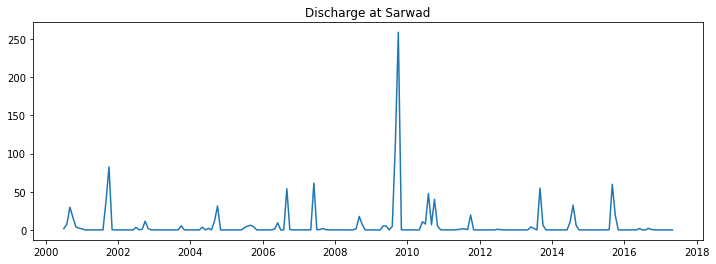

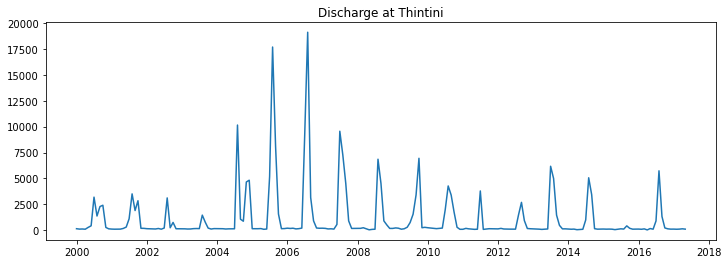

In [15]:
plt.figure(figsize=(12,4))
plt.plot(dh1.index, dh1['Discharge, Mm3/month'])
plt.title('Discharge at Sarwad')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12,4))
plt.plot(dh2.index, dh2['Discharge, Mm3/month'])
plt.title('Discharge at Thintini')
plt.ylabel('')
plt.show()

Were are the flow discharge stations located? We can retrieve their coordinates from a shapefile:

In [19]:
locfile = r"Data/hydrological_gauges_WGS84.shp"
shape = shapefile.Reader(locfile)
Hcoords = {}
for feature in shape.shapeRecords():
    first = feature.shape.__geo_interface__  
    Hcoords[feature.record[2]] = first['coordinates']
del Hcoords['']
Hcoords

{'Hydr 2': (76.65904428599917, 16.366196902956226),
 'Hydr 1': (75.63038452603722, 16.71099561840741)}

We are now going to look at remote sensing evapotranspiration in nectf format for teh study area:

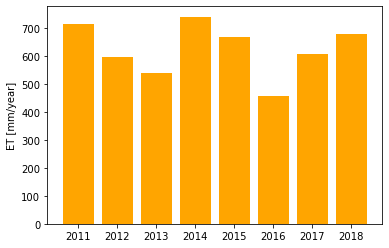

In [22]:
et = xr.open_dataset(r"Data/evapotranspiration_yearly.nc")
etvar = et.ETa
mean_et = etvar.mean(dim=['latitude','longitude'])
plt.bar(list(range(2011,2019)),mean_et, color='orange')
plt.ylabel('ET [mm/year]')
plt.show()

In the next cell make a new bar plot of ET using a different color:

Meteo Data

In the next section we analyse precipitation data, both in-situ and RS. We have data for six metereological stations. Daily data is provided in excell format from 2000 to 2018.

In [24]:
meteofile = r"Data/Meteorological data.xlsx"
df = pd.read_excel(meteofile, engine='openpyxl')
dm1t = df.loc[df.Name=='Meteo 1']
dm2t = df.loc[df.Name=='Meteo 2']
dm3t = df.loc[df.Name=='Meteo 3']
dm4t = df.loc[df.Name=='Meteo 4']
dm5t = df.loc[df.Name=='Meteo 5']
dm6t = df.loc[df.Name=='Meteo 6']
dd1 = dm1t.set_index('Date')
dd2 = dm2t.set_index('Date')
dd3 = dm3t.set_index('Date')
dd4 = dm4t.set_index('Date')
dd5 = dm5t.set_index('Date')
dd6 = dm6t.set_index('Date')

We are interested in monthly data (because our remote sensing data is available monthly).


In the first six lines we are resampling our data from daily to monthly, how should we do it? you can choose between the following options:

1) .mean() for the average

2) .max() for the max value

3) .sum() to sum the values

Type one of the three options after the dot.

In [27]:
dm1 = dd1.resample('M').
dm2 = dd2.resample('M').
dm3 = dd3.resample('M').
dm4 = dd4.resample('M').
dm5 = dd5.resample('M').
dm6 = dd6.resample('M').

dm1.index = [datetime.datetime(i.year, i.month, 1) for i in dm1.index]
dm2.index = [datetime.datetime(i.year, i.month, 1) for i in dm2.index]
dm3.index = [datetime.datetime(i.year, i.month, 1) for i in dm3.index]
dm4.index = [datetime.datetime(i.year, i.month, 1) for i in dm4.index]
dm5.index = [datetime.datetime(i.year, i.month, 1) for i in dm5.index]
dm6.index = [datetime.datetime(i.year, i.month, 1) for i in dm6.index]

dmdic = {'Meteo 1': dm1,
         'Meteo 2': dm2,
         'Meteo 3': dm3,
         'Meteo 4': dm4,
         'Meteo 5': dm5,
         'Meteo 6': dm6,
        }

And now some plots...

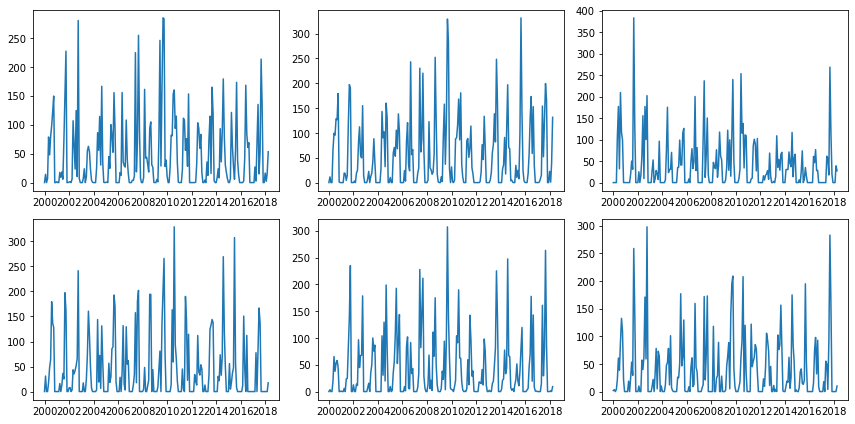

In [29]:
plt.figure(figsize=(12,6))
for (i,dm) in enumerate([dm1,dm2,dm3,dm4,dm5,dm6]):
    plt.subplot(2,3,i+1)
    plt.plot(dm.index, dm['Precipitation, mm'])
plt.tight_layout()

We need to kow the locations of the meteorological stations for comparing to the RS data:

In [30]:
locfile = r"Data/meteorological_stats.shp"
shape = shapefile.Reader(locfile)
Mcoords = {}
for feature in shape.shapeRecords():
    first = feature.shape.__geo_interface__  
    Mcoords[feature.record[1]] = first['coordinates']
del Mcoords['']

Type print(Mcoords) to visualize the coordinates of the six stations and run the cell. Do not worry if they are not in order.

Now we are going to load the netcdf containing the RS data for precipitation (CHIRPS data) and we are going to plot the first month and overlay the location of one of the stations:

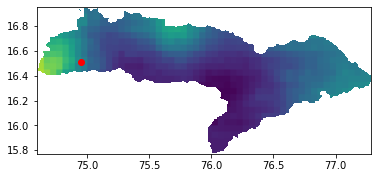

In [32]:
p_path = r"Data/p_monthly.nc"
p = xr.open_dataset(p_path, chunks=500)
extent = extent=(p.longitude[0],p.longitude[-1],p.latitude[-1],p.latitude[0])
plt.imshow(p.P[0], extent=extent)
plt.scatter(74.9492, 16.5134, color='r')
plt.show()

Create a new figure that shows the first monthly rainfall together with two station locations

With the code below we create graphs (line plots) comparing in-situ and remote sensign preciptiation at the station locations for all six stations.

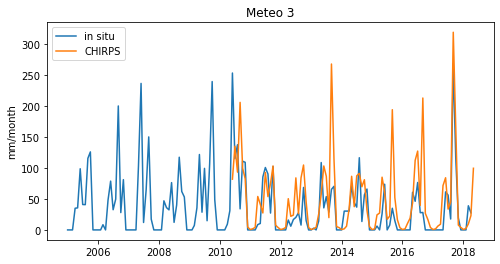

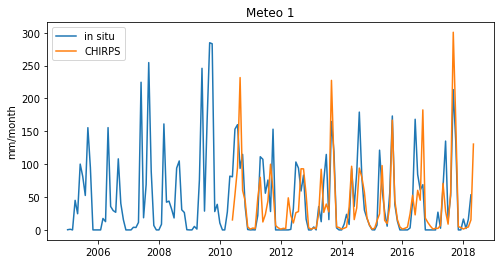

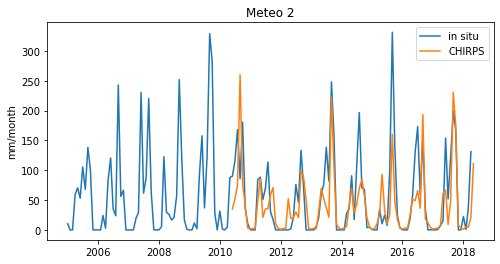

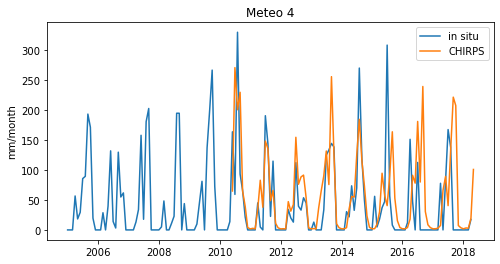

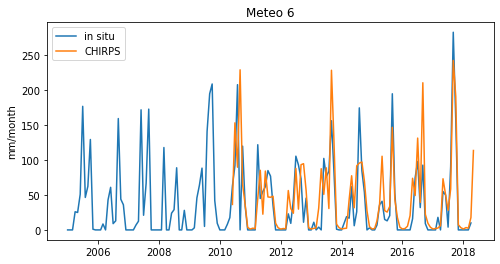

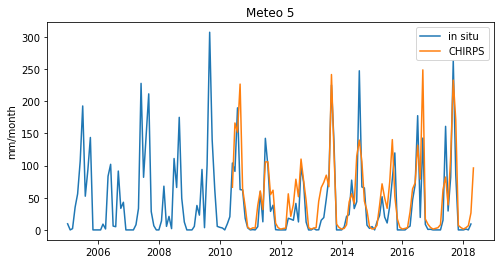

In [35]:
for i, stat in enumerate(Mcoords):
    plt.figure(figsize=(8,4))
    lon = Mcoords[stat][0]
    lat = Mcoords[stat][1]
    df1 = dmdic[stat][60:]
    psel = p.sel(longitude=lon, latitude=lat, method ='nearest')
    plt.plot(df1.index, df1['Precipitation, mm'], label = 'in situ')
    plt.plot(psel.time, psel.P.values, label = 'CHIRPS')
    plt.title(stat)
    plt.ylabel('mm/month')
    plt.legend()
    plt.show()
    plt.close()

And now scatterplots:

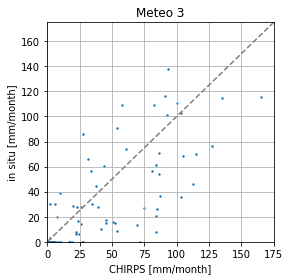

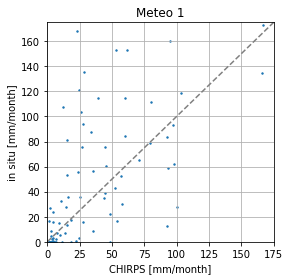

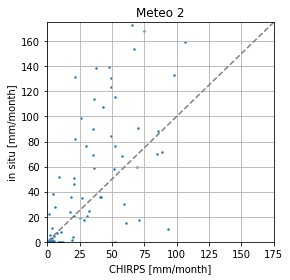

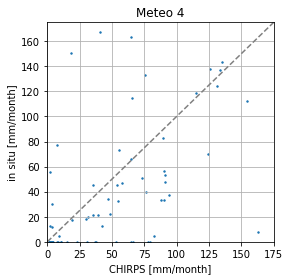

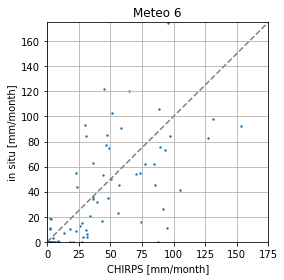

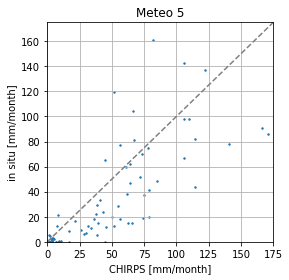

In [36]:
for i, stat in enumerate(Mcoords):
    plt.figure(figsize=(4,4))
    lon = Mcoords[stat][0]
    lat = Mcoords[stat][1]
    df1 = dmdic[stat][125:]
    psel = p.sel(longitude=lon, latitude=lat, method ='nearest')
    plt.plot([0,175],[0,175],'--', color='grey')
    plt.scatter(psel.P.values[:-1], df1['Precipitation, mm'], s=2)
    plt.title(stat)
    plt.xlabel('CHIRPS [mm/month]')
    plt.ylabel('in situ [mm/month]')
    plt.tight_layout()
    plt.grid()
    plt.xlim([0,175])
    plt.ylim([0,175])
    plt.show()
    plt.close()

Finally some statistics. We are going to plot the mean square error and the r2 of each station in the scatter plot. It might take a little bit to run (Python is doing a lot of calculations for you!).

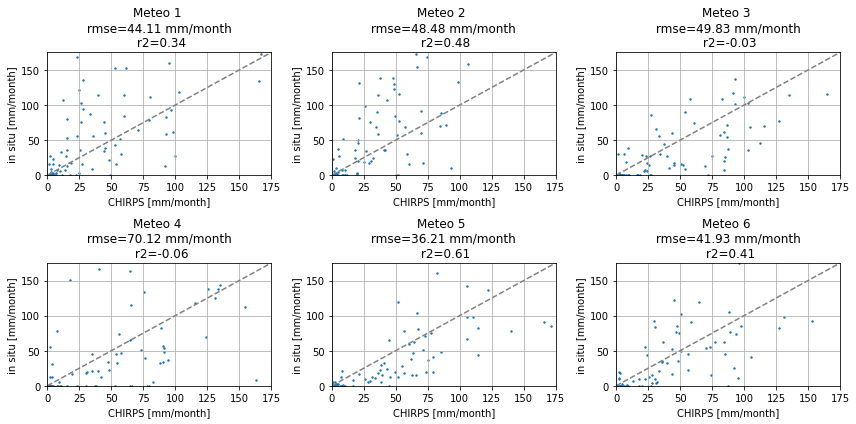

In [37]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(12,6))
for i, stat in enumerate(sorted(Mcoords)):
    plt.subplot(2,3,i+1)
    lon = Mcoords[stat][0]
    lat = Mcoords[stat][1]
    df1 = dmdic[stat][125:]
    psel = p.sel(longitude=lon, latitude=lat, method ='nearest')
    plt.plot([0,175],[0,175],'--', color='grey')
    plt.scatter(psel.P.values[:-1], df1['Precipitation, mm'], s=2)
    rmse = mean_squared_error(df1['Precipitation, mm'], psel.P.values[:-1], squared=False)
    r2 = r2_score(df1['Precipitation, mm'], psel.P.values[:-1])
    plt.title('{} \n rmse={:.2f} mm/month \n r2={:.2f}'.format(stat, rmse, r2))#stat+'\n rmse = '+str(rmse)+' r2= '+str(r2))
    plt.xlabel('CHIRPS [mm/month]')
    plt.ylabel('in situ [mm/month]')
    plt.tight_layout()
    plt.grid()
    plt.xlim([0,175])
    plt.ylim([0,175])